Copiar el link del partido

In [22]:
# match_url = 'https://www.sofascore.com/rosario-central-independiente/jobsrob#11938079' #Independiente - Rosario Central
# match_url = 'https://www.sofascore.com/barcelona-napoli/oebsrgb#11905257' #Barcelona - Napoli
# match_url = 'https://www.sofascore.com/west-ham-united-brighton-and-hove-albion/FsM#11352466' #West Ham - Brighton
# match_url = 'https://www.sofascore.com/liverpool-nottingham-forest/osU#11352556' #Liverpool - Nottingham Forest
# match_url = 'https://www.sofascore.com/luton-town-aston-villa/Psxb#11352545' #Luton Town - Aston Villa
# match_url = 'https://www.sofascore.com/argentinos-juniors-independiente/jobsqob#11938120' #Independiente - Argentinos
# match_url = 'https://www.sofascore.com/liverpool-manchester-united/KU#10652686'
# match_url = 'https://www.sofascore.com/argentina-france/GObsuWb#10230635' #Argentina - France FINAL DEL MUNDO
match_url = 'https://www.sofascore.com/manchester-united-manchester-city/rK#11352548'




In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, PyPizza
import requests
import json
from bs4 import BeautifulSoup
from PIL import Image
import numpy as np
from urllib.request import urlopen
import ScraperFC as sfc
sofascore = sfc.Sofascore()
from urllib.error import HTTPError
pd.set_option('display.max_columns', None)
import re

In [24]:
URL1 = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL1)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)

In [25]:
nombre_equipo_local = sofascore.get_team_names(match_url)[0]
nombre_equipo_visitante = sofascore.get_team_names(match_url)[1]
print(f'{nombre_equipo_local} vs {nombre_equipo_visitante}')

Manchester City vs Manchester United


In [26]:
estadisticas_partido = sofascore.get_general_match_stats(match_url= match_url)
display(estadisticas_partido)
data_partido = sofascore.get_match_data(match_url)
display(data_partido.keys())

#Busco los colores de cada equipo
id_color_local = data_partido['homeTeam']['teamColors']['primary']
id_color_away = data_partido['awayTeam']['teamColors']['primary']

,name,home,homeValue,homeTotal,away,awayValue,awayTotal
0,Expected goals,3.33,3.33,NaN,0.25,0.25,NaN
0,Ball possession,73%,73.00,NaN,27%,27.00,NaN
0,Total shots,27,27.00,NaN,3,3.00,NaN
1,Shots on target,8,8.00,NaN,1,1.00,NaN
2,Shots off target,8,8.00,NaN,2,2.00,NaN
3,Blocked shots,11,11.00,NaN,0,0.00,NaN
0,Corner kicks,15,15.00,NaN,2,2.00,NaN
1,Offsides,0,0.00,NaN,1,1.00,NaN
2,Fouls,5,5.00,NaN,10,10.00,NaN
3,Yellow cards,0,0.00,NaN,1,1.00,NaN


In [ ]:
estadisticas_jugadores_away = sofascore.get_players_match_stats(match_url)[1]
estadisticas_jugadores_local = sofascore.get_players_match_stats(match_url)[0]
display(estadisticas_jugadores_local.sample(3))
display(estadisticas_jugadores_away.sample(3))

,name,slug,shortName,position,jerseyNumber,userCount,id,country,marketValueCurrency,dateOfBirthTimestamp,fieldTranslations,firstName,lastName,shirtNumber,jerseyNumber,position,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,aerialWon,duelWon,totalClearance,punches,totalKeeperSweeper,accurateKeeperSweeper,minutesPlayed,touches,rating,possessionLostCtrl,ratingVersions,goalsPrevented,totalCross,accurateCross,duelLost,dispossessed,onTargetScoringAttempt,blockedScoringAttempt,interceptionWon,totalTackle,expectedGoals,expectedAssists,aerialLost,totalContest,wasFouled,keyPass,goalAssist,challengeLost,bigChanceCreated,fouls,bigChanceMissed,goals,wonContest,shotOffTarget,captain,team
18,Rico Lewis,rico-lewis,R. Lewis,M,82,5978,1136731,"{'alpha2': 'EN', 'name': 'England'}",EUR,1100995200,"{'nameTranslation': {'ar': 'لويس ، ريكو'}, 'sh...",Rico Lewis,,82,82,D,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester City
0,Ederson,ederson,Ederson,G,31,20011,254491,"{'alpha2': 'BR', 'name': 'Brazil'}",EUR,745545600,"{'nameTranslation': {'ar': 'ايدرسون'}, 'shortN...",NaN,NaN,31,31,G,False,27.0,24.0,7.0,5.0,2.0,2.0,2.0,1.0,3.0,3.0,90.0,35.0,6.6,3.0,"{'original': 6.6, 'alternative': 6.5}",-0.7251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester City
19,Mateo Kovačić,mateo-kovacic,M. Kovačić,M,8,18601,136710,"{'alpha2': 'HR', 'name': 'Croatia'}",EUR,768182400,"{'nameTranslation': {'ar': 'كوفاسيتش, ماتيو'},...",NaN,NaN,8,8,M,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester City


,name,firstName,lastName,slug,shortName,position,jerseyNumber,userCount,id,country,marketValueCurrency,dateOfBirthTimestamp,fieldTranslations,shirtNumber,jerseyNumber,position,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,aerialWon,duelWon,totalClearance,goodHighClaim,savedShotsFromInsideTheBox,saves,punches,minutesPlayed,touches,rating,possessionLostCtrl,ratingVersions,expectedAssists,goalsPrevented,duelLost,totalContest,wonContest,outfielderBlock,totalTackle,wasFouled,fouls,challengeLost,interceptionWon,aerialLost,shotOffTarget,expectedGoals,dispossessed,totalCross,goalAssist,bigChanceCreated,keyPass,bigChanceMissed,onTargetScoringAttempt,goals,totalOffside,errorLeadToAGoal,captain,team
16,Habeeb Ogunneye,Habeeb Ogunneye,NaN,ogunneye-habeeb,H. Ogunneye,D,75,244,1150926,"{'alpha2': 'EN', 'name': 'England'}",EUR,1131753600,NaN,75,75,D,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United
12,Antony,,,antony,Antony,M,21,53922,958380,"{'alpha2': 'BR', 'name': 'Brazil'}",EUR,951350400,"{'nameTranslation': {'ar': 'سانتوس, أنتوني'}, ...",21,21,F,True,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,6.0,6.2,2.0,"{'original': 6.2, 'alternative': 6.2}",NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Manchester United
3,Jonny Evans,,,jonny-evans,J. Evans,D,35,2663,30144,"{'alpha2': 'NX', 'name': 'Northern Ireland'}",EUR,568166400,"{'nameTranslation': {'ar': 'ايفانز, جوني'}, 's...",35,35,D,False,15.0,12.0,1.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,69.0,31.0,7.2,5.0,"{'original': 7.2, 'alternative': 7.3}",NaN,NaN,NaN,1.0,1.0,2.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United


#### Armado del grid

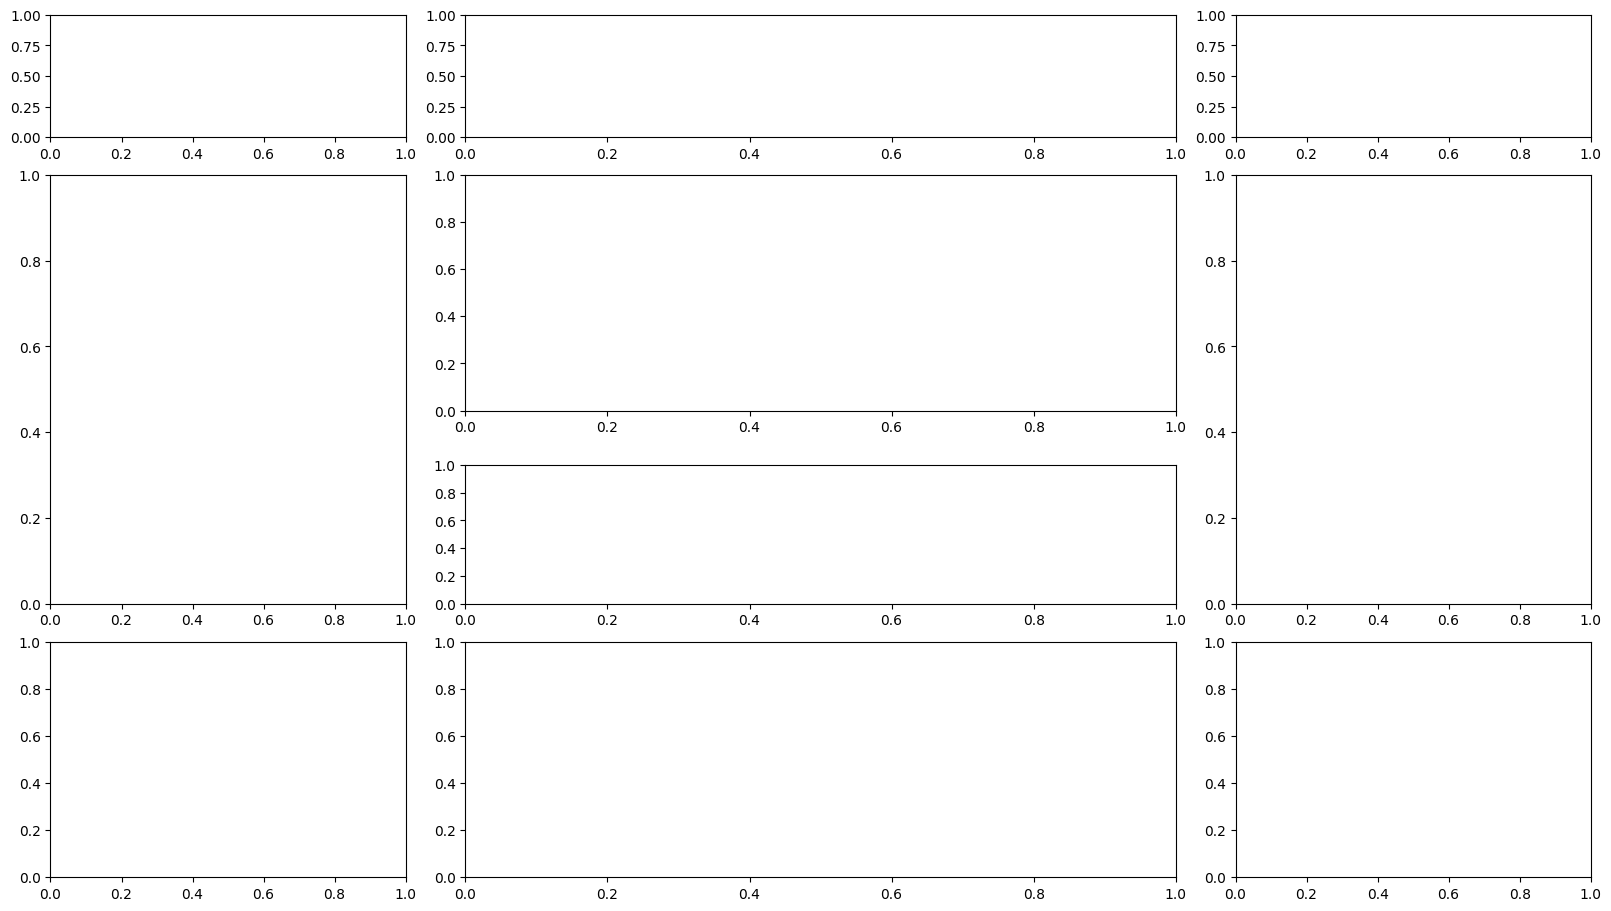

In [ ]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
nrows = 6
ncols = 4
gs = fig.add_gridspec(nrows=10,ncols=4)
fig.set_facecolor('white')

# ax = {}
# a = 1
# Gráficos simétricos
# for row in range(nrows):
#     for col in range(ncols): 
#         ax[a] = fig.add_subplot(gs[row,col]);
#         ax[a].set_title(f'[{row},{col}]');
#         a = a + 1


ax1 = fig.add_subplot(gs[0:2,0])
# ax1.set_title('Title grid [0,0]')
# ax1.text(.5,.5,'Escudo Local')

ax2 = fig.add_subplot(gs[0:2,1:3])
# ax2.text(.5,.5,'MATCH stats')

ax3 = fig.add_subplot(gs[0:2,3])
# ax3.text(.5,.5,'Escudo Away')

ax4 = fig.add_subplot(gs[2:7,0])
# ax4.text(.5,.5,'AVG position Local')

ax5 = fig.add_subplot(gs[2:7,3])
# ax5.text(.5,.5,'AVG position Away')

ax6 = fig.add_subplot(gs[2:5,1:3])
# ax6.text(.5,.5,'MATCH stats')

ax7 = fig.add_subplot(gs[7:10,0])
# ax7.text(.5,.5,'SHOT MAP Local')

ax8 = fig.add_subplot(gs[7:10,3])
# ax8.text(.5,.5,'SHOT MAP Away')

ax9 = fig.add_subplot(gs[5:7,1:3])
# ax9.text(.5,.5,'MATCH MOMENTUM GRAPH')

ax10 = fig.add_subplot(gs[7:10,1:3])
# ax10.text(.5,.5,'FIGURA heatmap, foto y name')

In [ ]:
def sacar_spines(ax):
    ax.spines[['top','right','bottom','left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

Escudos

In [ ]:
id_local = data_partido['homeTeam']['id']
id_away = data_partido['awayTeam']['id']

escudo_local = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_local}/image'))
escudo_away = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_away}/image'))

ax1.imshow(escudo_local)
sacar_spines(ax1)
ax3.imshow(escudo_away)
sacar_spines(ax3)

Datos del partido

In [ ]:
sacar_spines(ax2)
ax2.text(x = 0.52, y = 1, ha = 'center', va = 'center', s = f'{data_partido['tournament']['uniqueTournament']['name']}', fontproperties = catamaran.prop, fontsize = 15)
ax2.text(x = 0.52, y = 0.8, ha = 'center', va = 'center', s = f'{nombre_equipo_local} - {nombre_equipo_visitante}', fontproperties = catamaran.prop, fontsize = 20)
ax2.text(x = 0.52, y = 0.4, ha = 'center', va = 'center', s = f'{data_partido['homeScore']['current']} - {data_partido['awayScore']['current']}', fontproperties = robotto_regular.prop, fontsize = 50)
ax2.text(x = 0, y = 1, ha = 'left', va = 'center', s = f'{data_partido['homeTeam']['venue']['stadium']['name']}', fontproperties = robotto_regular.prop, fontsize = 13)

import datetime
timestamp = data_partido['startTimestamp'] 
date = datetime.datetime.utcfromtimestamp(timestamp).strftime('%d/%m/%Y %H:%M')
date

ax2.text(x = 1, y = 1, ha = 'right', va = 'center', s = f'{date}', fontproperties = robotto_regular.prop, fontsize = 13)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10860\2692654359.py:9: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.datetime.utcfromtimestamp(timestamp).strftime('%d/%m/%Y %H:%M')


Text(1, 1, '03/03/2024 15:30')

AVG Position

In [ ]:
color_contorno = 'black'
color_numero = 'white'
posiciones_promedio_local = sofascore.get_players_average_positions(match_url)[0]
mas_mins_jugados_11_local = list(estadisticas_jugadores_local.sort_values(by = 'minutesPlayed', ascending= False).head(11)['name'])
posiciones_promedio_local = posiciones_promedio_local.loc[posiciones_promedio_local.apply(lambda x: x['name'] in mas_mins_jugados_11_local, axis = 1)]
posiciones_promedio_local.reset_index(drop = True, inplace = True)

# fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'opta',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    pitch_color= 'white',
    # pitch_color='#22312b', 
    line_color='black',
    stripe = True, 
    stripe_color= '#e9e7e7',
    corner_arcs= True, 
    )

pitch.draw(ax = ax4)
pitch.scatter(posiciones_promedio_local.averageX, y = posiciones_promedio_local.averageY, ax = ax4, color = id_color_local, s = 600, edgecolor = color_contorno, alpha = 0.8)

# Para agregar el número, pero en algunos partidos no anda y no sé la razón
jugadores = posiciones_promedio_local.jerseyNumber
for jugador in jugadores:
    df = posiciones_promedio_local.loc[posiciones_promedio_local.jerseyNumber == f'{jugador}']
    ax4.text(x = df.averageY, y = df.averageX, s = f'{jugador}', va = 'center', ha = 'center', color = color_numero)

In [ ]:
color_contorno = 'black'
posiciones_promedio_away = sofascore.get_players_average_positions(match_url)[1]
mas_mins_jugados_11_away = list(estadisticas_jugadores_away.sort_values(by = 'minutesPlayed', ascending= False).head(11)['name'])
posiciones_promedio_away = posiciones_promedio_away.loc[posiciones_promedio_away.apply(lambda x: x['name'] in mas_mins_jugados_11_away, axis = 1)]
posiciones_promedio_away.reset_index(drop = True, inplace = True)
posiciones_promedio_away.fillna(0, inplace = True)


# fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'opta',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    pitch_color= 'white',
    # pitch_color='#22312b', 
    line_color='black',
    stripe = True, 
    stripe_color= '#e9e7e7',
    corner_arcs= True, 
    )

pitch.draw(ax = ax5)
pitch.scatter(posiciones_promedio_away.averageX, y = posiciones_promedio_away.averageY, ax = ax5, color = id_color_away, s = 600, edgecolor = color_contorno, alpha = 0.8)

# Para agregar el número, pero en algunos partidos no anda y no sé la razón
jugadores = posiciones_promedio_away.jerseyNumber
for jugador in jugadores:
    df = posiciones_promedio_away.loc[posiciones_promedio_away.jerseyNumber == f'{jugador}']
    ax5.text(x = df.averageY, y = df.averageX, s = f'{jugador}', va = 'center', ha = 'center', color = color_numero)


Estadísticas generales del partido

In [ ]:
#Limpio el dataframe y me quedo sólo con las categorías que me interesan
categorias = ['Ball possession', 'Total shots', 'Shots on target', 'Expected goals', 'Yellow cards', 'Duels won']
stats_partido_relevantes = estadisticas_partido.loc[estadisticas_partido.apply(lambda x: x['name'] in categorias, axis = 1)].sort_values(by = 'name',ascending=False)
stats_partido_relevantes = stats_partido_relevantes.drop(columns= ['homeValue','homeTotal','awayValue','awayTotal'])
stats_partido_relevantes.reset_index(drop = True, inplace = True)
stats_partido_relevantes

,name,home,away
0,Yellow cards,0,1
1,Total shots,27,3
2,Shots on target,8,1
3,Expected goals,3.33,0.25
4,Duels won,34,40
5,Ball possession,73%,27%


In [ ]:
#Arreglo los spines dejando el de arriba y el de abajo para separar visualmente
sacar_spines(ax6)
ax6.axhline(y = 0, color = 'black')
ax6.axhline(y = 1, color = 'black')

#Recorro el dataframe de las estadísticas importantes y voy armando el texto

y = 0.9

for i in range(stats_partido_relevantes.shape[0]):
    stat = stats_partido_relevantes.name[i]
    stat_local = stats_partido_relevantes.home[i]
    stat_away = stats_partido_relevantes.away[i]
    if i == 1:
        tiros_local = stats_partido_relevantes.home[2]
        tiros_away = stats_partido_relevantes.away[2]
        ax6.text(x = 0.52, y = y, ha = 'center', va = 'center', s = f'{stat_local} ({tiros_local}) - {stat} - {stat_away} ({tiros_away})', fontproperties = robotto_regular.prop, fontsize = 15)            
    elif i == 2:
        continue
    else:
        ax6.text(x = 0.52, y = y, ha = 'center', va = 'center', s = f'{stat_local} - {stat} - {stat_away}', fontproperties = robotto_regular.prop, fontsize = 15)
    y = y - 0.2

Match Momentum

In [ ]:
match_momentum = sofascore.match_momentum(match_url)

match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visitante = match_momentum[match_momentum['value'] < 0]

ax9.bar(match_momentum_local.minute, match_momentum_local.value, color = f'{id_color_local}', label = f'{nombre_equipo_local}')
ax9.bar(match_momentum_visitante.minute, match_momentum_visitante.value, color = f'{id_color_away}', label = f'{nombre_equipo_visitante}')

#Agrego las líneas al final de cada tiempo
ax9.axvline(x = 45, color = 'black', linewidth= 2, linestyle= '--')
ax9.axvline(x = 90 , color = 'black', linewidth= 2, linestyle= '--')

sacar_spines(ax9)
ax9.spines['bottom'].set_visible(True)

ax9.xaxis.set_visible(True)
ax9.set_xticks(np.arange(0, 100, step=15))
ax9.set_xlim(0,90 + data_partido['time']['injuryTime2'])

ax9.set_title( 'Match Momentum',fontproperties = robotto_regular.prop, ha = 'center', fontsize = 11)

Text(0.5, 1.0, 'Match Momentum')

Shot Maps

In [ ]:
# Importo los headers a través de Convertcurl.com
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-GB,en;q=0.8',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"dc6b2f18e5"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Chromium";v="122", "Not(A:Brand";v="24", "Brave";v="122"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
}

# response = requests.get('https://api.sofascore.com/api/v1/event/11938079/shotmap', headers=headers)

#Hay que agregar una key más al diccionario headers:
# The way to fix this is to add the 'If-Modified-Since' header to the request
# You can change this dynamically or just hardcode and change it every time you run the script

# headers['If-Modified-Since'] = 'Tues, 18 Jul 2023 00:00:00 GMT' ESTE ES EL FORMATO A PASAR

from datetime import datetime

# Get the current datetime
now = datetime.utcnow()

# Format the datetime string
formatted_date = now.strftime('%a, %d %b %Y %H:%M:%S %Z')

headers['If-Modified-Since'] = f'{formatted_date}GMT'

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10860\674782061.py:31: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow()


In [ ]:
# Define the URL
url = match_url

# Use regular expression to extract the id
match = re.search(r"#(\d+)", url)

# Check if the id is found
if match:
  # Extract the id from the match object
  id = match.group(1)
else:
  print("No id found in the URL")

response = requests.get(f'https://api.sofascore.com/api/v1/event/{id}/shotmap', headers=headers)

response.status_code #Si sale 200, es que la request salió bien

200

In [ ]:
# Now we can get the data we want
shots = response.json()

#Convierto a DataFrame
tiros = pd.DataFrame(shots['shotmap'])

#Separo las coordenadas de la posición de tiro
tiros[['x','y','z']] = tiros['playerCoordinates'].apply(pd.Series)

#Limpio el formato con el que salen los nombres de los jugadores
def extract_name(player_dict):
  return player_dict['name']
# Apply the function to the 'player' column using apply()
tiros['player'] = tiros['player'].apply(extract_name)

#Armo los dataframes para local y visitante
tiros_local = tiros[tiros['isHome'] == True][['player','x','y','shotType','time']]
tiros_away = tiros[tiros['isHome'] == False][['player','x','y','shotType','time']]

#Separo los Dataframes por gol o no gol
No_gol_local = tiros_local[tiros_local['shotType'] != 'goal']
no_gol_away =  tiros_away[tiros_away['shotType'] != 'goal']

gol_local = tiros_local[tiros_local['shotType'] == 'goal']
gol_away =  tiros_away[tiros_away['shotType'] == 'goal']


In [ ]:
#Ploteo Local

pitch = VerticalPitch(
    pitch_type= 'opta',
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    pitch_color= 'white',
    # pitch_color='#22312b', 
    line_color='black',
    stripe = True, 
    stripe_color= '#e9e7e7',
    corner_arcs= True, 
    pad_top= -(125-tiros_local.x.max()),  
    pad_bottom=5,  # extend the bottom axis 5 data units
    )


pitch.draw(ax = ax7)
pitch.scatter(gol_local.x, y = gol_local.y, ax = ax7, color = id_color_local, s = 130, edgecolor = 'green', alpha = 0.95, zorder = 99)
pitch.scatter(x = No_gol_local.x, y = No_gol_local.y, ax = ax7, alpha = 0.4, c = id_color_local, ec = color_contorno, s = 150, zorder = 1)

ax7.invert_yaxis()
ax7.invert_xaxis()

In [ ]:
#Ploteo Away 

pitch = VerticalPitch(
    pitch_type= 'opta',
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    pitch_color= 'white',
    # pitch_color='#22312b', 
    line_color='black',
    stripe = True, 
    stripe_color= '#e9e7e7',
    corner_arcs= True, 
    pad_top= -(125-tiros_away.x.max()),  
    pad_bottom=5  # extend the bottom axis 5 data units
    )


pitch.draw(ax = ax8)
pitch.scatter(x = gol_away.x, y = gol_away.y, ax = ax8, color = id_color_away, s = 130, edgecolor = 'green', alpha = 0.95, zorder = 99)
pitch.scatter(x = no_gol_away.x, y = no_gol_away.y, ax = ax8, alpha = 0.4, c = id_color_away, ec = color_contorno, s = 150, zorder = 1)

ax8.invert_yaxis()
ax8.invert_xaxis()

In [ ]:
#Agrego los goles a los datos del partido
goles_local = tiros_local[tiros_local['shotType'] == 'goal']
goles_away = tiros_away[tiros_away['shotType'] == 'goal']
goles_local.reset_index(drop = True, inplace = True)
goles_away.reset_index(drop = True, inplace = True)

a = 0.1
for i in range(goles_local.shape[0]):
    ax2.text(x = 0.15, y = 0.4 + a, ha = 'left', va = 'center', s = f"{goles_local.time[i]}' {goles_local.player[i]}", fontproperties = robotto_regular.prop, fontsize = 13)
    a = a - 0.15

a = 0.1
for i in range(goles_away.shape[0]):
    ax2.text(x = 0.7, y = 0.4 + a, ha = 'left', va = 'center', s = f"{goles_away.time[i]}' {goles_away.player[i]}", fontproperties = robotto_regular.prop, fontsize = 13)
    a = a - 0.15


Figura del Partido

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:753: Futu

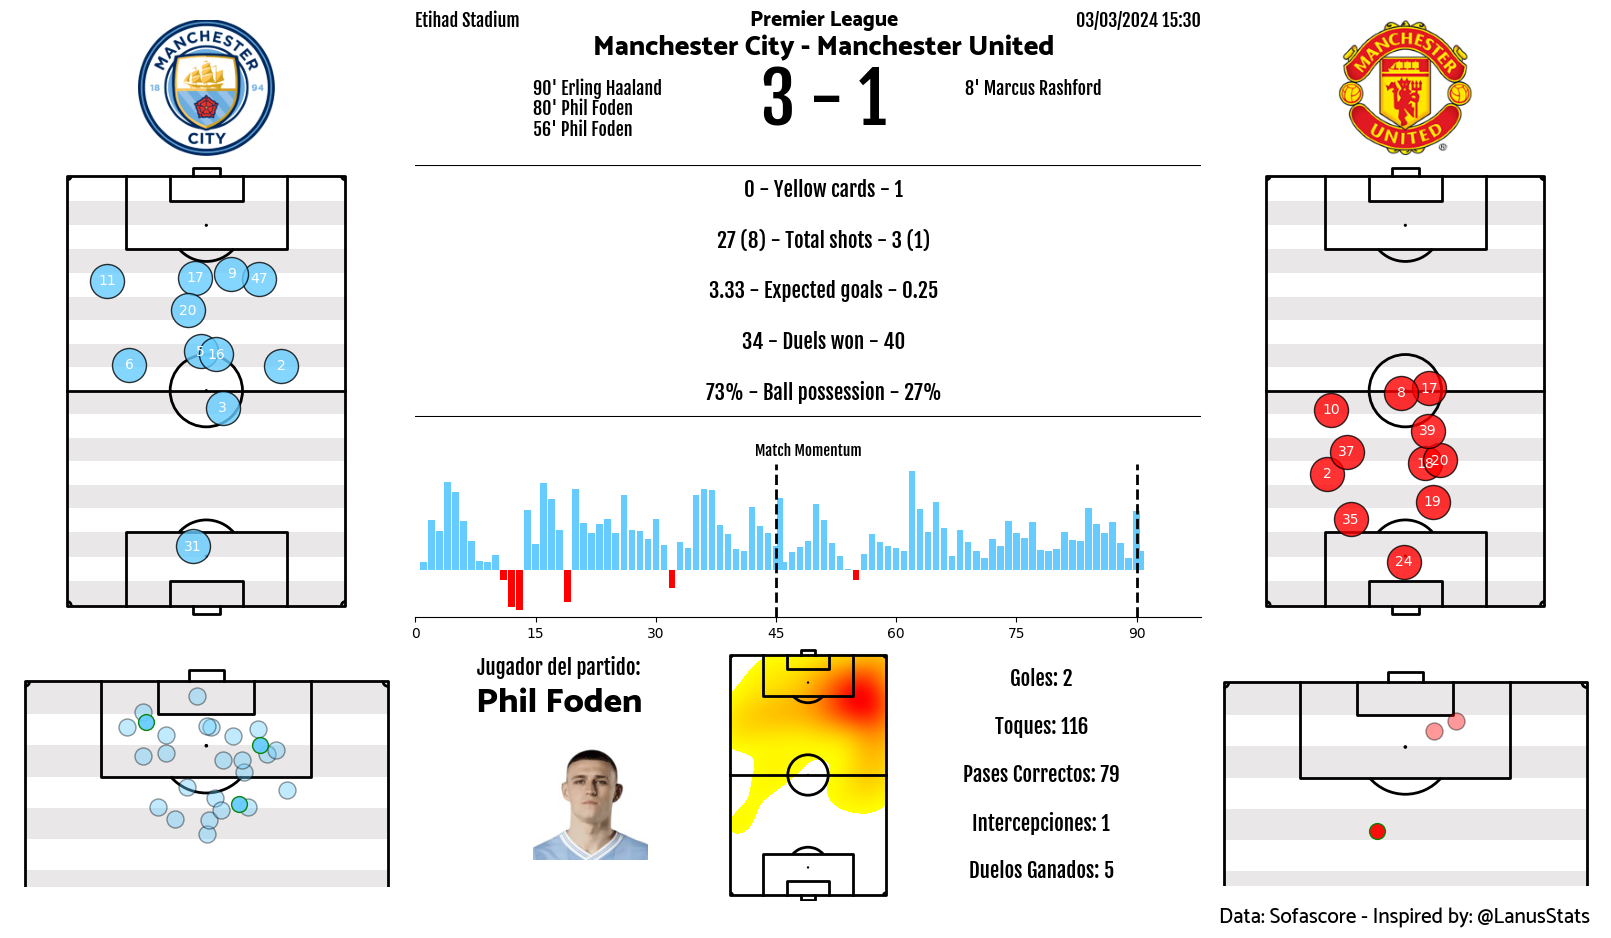

In [85]:
estadisticas_jugadores_local = estadisticas_jugadores_local.loc[:,~estadisticas_jugadores_local.columns.duplicated()].reset_index(drop=True)
estadisticas_jugadores_away = estadisticas_jugadores_away.loc[:,~estadisticas_jugadores_away.columns.duplicated()].reset_index(drop=True)

# Concatenate the dataframes
estadisticas_jugadores_todos = pd.concat([estadisticas_jugadores_local, estadisticas_jugadores_away])
estadisticas_jugadores_todos.reset_index(drop=True, inplace= True)
nuevos_nombres = {
    'name': 'Nombre',
    'position': 'position',
    'id': 'id',
    'totalPass': 'Pases Totales',
    'accuratePass': 'Pases Correctos',
    'duelWon': 'Duelos Ganados',
    'saves': 'Atajadas',
    'touches': 'Toques',
    'rating': 'rating',
    'interceptionWon': 'Intercepciones',
    'keyPass': 'Pases Clave',
    'goals': 'Goles',
    'bigChanceCreated': 'Grandes Chances Generadas',
    'team': 'team'
}
estadisticas_jugadores_todos = estadisticas_jugadores_todos.rename(columns=nuevos_nombres)

#Obtengo la figura
jugador_del_partido = estadisticas_jugadores_todos[['Nombre', 'position', 'id', 'Pases Totales', 'Pases Correctos', 'Duelos Ganados', 'Atajadas', 'Toques', 'rating', 'Intercepciones', 'Pases Clave', 'Goles', 'Grandes Chances Generadas', 'team']].sort_values(by = 'rating', ascending=False).head(1)
jugador_del_partido.fillna(0, inplace=True)
columns_to_convert = ['Pases Totales', 'Pases Correctos', 'Duelos Ganados', 'Atajadas', 'Toques', 'rating', 'Intercepciones', 'Pases Clave', 'Goles', 'Grandes Chances Generadas']
jugador_del_partido[columns_to_convert] = jugador_del_partido[columns_to_convert].astype(int)

#Obtengo los parámetros relevantes según la posición del jugador
params = []
if jugador_del_partido['position'].values[0] == 'D':
    params.extend(['Goles','Duelos Ganados', 'Intercepciones', 'Pases Totales', 'Pases Correctos'])
elif jugador_del_partido['position'].values[0] == 'G':
    params.extend(['Atajadas'])
elif jugador_del_partido['position'].values[0] == 'M':
    params.extend(['Goles','Toques', 'Pases Correctos','Intercepciones', 'Duelos Ganados'])
else:
    params.extend(['Goles', 'Toques', 'Pases Clave', 'Pases Correctos'])

#Obtengo los valores de esos parámetros
values = jugador_del_partido[params].values.tolist()
values = [item for sublist in values for item in sublist]

heat_map_location = sofascore.get_player_heatmap(match_url, player = jugador_del_partido.Nombre.values[0])

pitch = VerticalPitch(
    pitch_type= 'opta',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    pitch_color= 'white',
    # pitch_color='#22312b', 
    line_color='black',
    stripe_color= '#e9e7e7',
    corner_arcs= True, 
    )

pitch.draw(ax = ax10)

pitch.kdeplot(x = heat_map_location['x'], y = heat_map_location['y'], ax = ax10, levels=100,shade=True,zorder=-1,shade_lowest=False,cmap='autumn_r')

#Recorro el dataframe de las estadísticas importantes y voy armando el texto

y = 90

for i in range(len(params)):
    ax10.text(x = -100, y = y, ha = 'center', va = 'center', s = f'{params[i]}: {values[i]}', fontproperties = robotto_regular.prop, fontsize = 15)
    y = y - 20

# Agrego Imagen
id_jugador_del_partido = jugador_del_partido['id'].values[0]

try:
    img_jugador_del_partido = Image.open(urlopen(f'https://api.sofascore.app/api/v1/player/{id_jugador_del_partido}/image'))
except HTTPError:
    if jugador_del_partido['team'].values[0] == sofascore.get_team_names(match_url)[0]:
        img_jugador_del_partido = escudo_local
    else:
        img_jugador_del_partido = escudo_away
ax10_image = add_image(
    img_jugador_del_partido, fig , left=0.3, bottom=0.05, width=0.13, height=0.127
)   # these values might differ when you are plotting

ax10.text(x = 210, y = 95, ha = 'center', va = 'center', s = f'Jugador del partido:', fontproperties = robotto_regular.prop, fontsize = 15)
ax10.text(x = 210, y = 80, ha = 'center', va = 'center', s = f'{jugador_del_partido['Nombre'].values[0]}', fontproperties = catamaran.prop, fontsize = 25)


#add credits
CREDIT_1 = "Data: Sofascore"
CREDIT_2 = "Inspired by: @LanusStats"

fig.text(
    0.99, -0.02, f"{CREDIT_1} - {CREDIT_2}", size=15,
    fontproperties=catamaran2.prop, color="black",
    ha="right"
)

fig